<a href="https://colab.research.google.com/github/suhayb-h/Acute-Lymphoblastic-Leukemia-Classifier/blob/main/2_Logistic_Regression_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acute Lymphoblastic Leukemia Classifier:
## Logistic Regression and Convolutional Neural Network Models
##### Project Author: Suhayb Hafiz 

---


The first models constructed to differentiate the C-NMC dataset used CNNs as the central defining characteristic. That principal ethos has not changed amidst new model construction. Initially, all models were either built on pre-trained models, through transfer learning, or processed through several models before being averaged, through ensemble modelling techniques. Based on newly constructed models, these practices have not changed yet. This limited construction practice has also limited the capability to explain model findings, with only 5 papers specifically outlining resultant computer vision findings. Furthermore, no specific conclusions were demonstrated as to what features differentiate normal cells from cancerous cells. 

There are fundamental absences in computer vision based cellular classification that this project will attempt to explore. No recurrent comparator model was ever constructed in a binary image classification problem and by extension no such model has ever been used to differentiate the C-NMC dataset. This process is typically resource intensive, and this may why it is not a commonly explored model architecture. To circumvent the computational requirement, training a model would require creating the model with the PyTorch library. Doing so would allow the code to run code through GPUs as opposed to bottlenecked CPUs. 

Ultimately, this project is purely an exploratory endeavor. Due to the lack of available computational resources, there is a natural limit to how complex experimental models can be. Despite the limitation, the central goal of this project remains unchanged. Hopefully, the experimental model construction should clearly outline the limitations and strengths of different machine learning types. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Preparing the Data

The initial steps were to import relevant libraries, import the dataset and scale the data. As mentioned earlier, the validation data set was utilized as the test set for this project. For this reason, a new validation set was created by splitting the training set directly from the data generator. 17.5% of the training set was chosen to be used as the validation dataset simply because it roughly equates to the size of the original validation data set.

Within the image data generators, all images were rescaled, randomly rotated, randomly flipped, and shuffled. These manipulations were established to implement as much randomness into the data as possible, while simultaneously maintaining the integrity of the images. Since these images were round cells without obvious directional polarity, rotating and flipping the cells should not affect the integrity of the sequential model. These manipulations also have an added benefit of increasing the perceived number of samples by the models. Finally, based on the analysis of colour distribution in the dataset, images were forced to retain their colors before training the model.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range = 180, 
                                   horizontal_flip = True, 
                                   vertical_flip = True, 
                                   validation_split = 0.175)

# Specified where images should be loaded from and additional attributes:
train_generator = \
train_datagen.flow_from_directory(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/training_data', 
    color_mode = 'rgb', 
    class_mode = 'categorical',
    shuffle = True, 
    subset = 'training')

validation_generator = \
train_datagen.flow_from_directory(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/training_data', 
    color_mode = 'rgb', 
    class_mode = 'categorical',
    shuffle = True, 
    subset = 'validation')

Found 8796 images belonging to 2 classes.
Found 1865 images belonging to 2 classes.


In [ ]:
# Weight calculation for normal lymphocytes:  
# Number of cancer cells divided by the number of normal cells.

7272/3389

2.145765712599587

In [ ]:
# Specify how the machine names classes:

class_names = validation_generator.class_indices
class_names

{'all': 0, 'hem': 1}

In [ ]:
# Weight of 2.15 is applied to 'hem' cells

weights = {0: 1,
           1: 2.15}

# Logistic Regression Model

The first step in experiment design was to establish a base model that would serve as a comparison baseline for other models. The initial intention was to construct a classic machine learning model, but such models required computational resources that were not available. Dealing with images through data generators proved to be computationally efficient and manageable, but data generators could only be used for TensorFlow, PyTorch or similar neural network libraries.

The most appropriate base model to assess the data distribution was a simple logistic regression model. Since traditional classic modelling libraries would fail to compute the image data, a logistic regression model was built through TensorFlow using a sequential neural network. Afterwards, more layers were added the logistic regression model to create a new simple sequential neural network.

A simple logistic regression model is a binary classification model. It assigns labels to one of two classes based on a where a data point lies along a sigmoid curve. Neural networks are constructed in layers, in which each layer performs a newfound mathematical function. Each added new layer adds complexity to the model that can translate into better learning. To replicate a logistic regression model, a neural network needed to be constructed that had as little learning functionality as possible, implying that the model needed to be simple in its construction. For this reason, a model that comprised of only two layers was instantiated. The first layer being the input layer, and the last layer being the output layer. Furthermore, the output layer was set to a sigmoidal activation parameter, thereby replicating the sigmoidal classification of a traditional logistic regression model. 
Typical neural network models are trained over time which is reflected by gradual increases in accuracy and gradual decreases in losses. However, due to the simplicity of the logistic regression model above, there appeared to be no obvious training in the training dataset or validation dataset. As mentioned earlier, this was implemented by design, as classic logistic regression models do not have the capability of improving performance overtime. Assessing this model’s performance on the test dataset provided a baseline accuracy by which to measure future model performance. 

As previously stated, the CSV file that was provided with the original data required labels to be reversed to have the same labels as the training and validation sets. This new column served as the target by which the test data could be assessed on.


In [ ]:
base_model = Sequential()

base_model.add(InputLayer(input_shape=(256, 256, 3)))
base_model.add(Flatten())

# Simulate a classic 'Logistic Regression' model by constructing a neural network:
# No layers were added between the input and output layers

base_model.add(Dense(2, activation='sigmoid'))

base_model.compile('SGD', # --> vs Adam
              loss=tf.losses.BinaryCrossentropy(), # --> Neccessary because this is a binary classifier?
              metrics = ['categorical_accuracy']) # --> Category is absolutely essential
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 2)                 393218    
                                                                 
Total params: 393,218
Trainable params: 393,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_categorical_accuracy', 
                           patience = 10,  
                           verbose = 1)

model_0 = base_model.fit(train_generator, 
                        epochs=25,
                        validation_data = validation_generator, 
                        shuffle=True, 
                        class_weight = weights,
                        callbacks = [early_stop])

Epoch 1/25
  7/275 [..............................] - ETA: 1:59:08 - loss: 1.0188 - categorical_accuracy: 0.5536

In [ ]:
pickle.dump(model_0, open(model_0.pkl, 'wb'))
pkl_0 = pickle.load(open(model_0.pkl, 'rb'))

In [ ]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1, 2, 1, title = 'Loss')
plt.plot(pkl_0.history['loss'], 
         color = 'teal', 
         label = 'loss')
plt.plot(pkl_0.history['val_loss'], 
         color = 'orange', 
         label = 'val_loss')
plt.legend(loc = "upper left")
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2, title = 'Accuracy')
plt.plot(pkl_0.history['categorical_accuracy'], 
         color = 'teal', 
         label = 'accuracy')
plt.plot(pkl_0.history['val_categorical_accuracy'], 
         color = 'orange', 
         label = 'val_accuracy')
plt.legend(loc = "upper left")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

#plt.subplots_adjust(wspace=1) 
plt.show()

In [ ]:
df_test = \
pd.read_csv(
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv', 
    dtype = str)

# a new column called labels_ was created wherein 'all' patients are labelled 0 
df_test.loc[df_test['Patient_ID'].str.contains('all'), 'true_labels'] = '0'

# labels_ was also given a label 1 for any patients that were non-cancerous
df_test.loc[df_test['Patient_ID'].str.contains('hem'), 'true_labels'] = '1'

df_test

,Patient_ID,new_names,labels,true_labels
0,UID_57_29_1_all.bmp,1.bmp,1,0
1,UID_57_22_2_all.bmp,2.bmp,1,0
2,UID_57_31_3_all.bmp,3.bmp,1,0
3,UID_H49_35_1_hem.bmp,4.bmp,0,1
4,UID_58_6_13_all.bmp,5.bmp,1,0
...,...,...,...,...
1862,UID_54_33_1_all.bmp,1863.bmp,1,0
1863,UID_55_24_1_all.bmp,1864.bmp,1,0
1864,UID_H32_20_1_hem.bmp,1865.bmp,0,1
1865,UID_54_30_2_all.bmp,1866.bmp,1,0


In [ ]:
# Apply the same rescaling factor as our other generators
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = \
test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = \
    '/content/drive/Othercomputers/My MacBook Air/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data',
    batch_size = 100,
    x_col = 'new_names',
    y_col = 'true_labels',
    color_mode = 'rgb',
    class_mode = 'categorical')

X_test, y_test = test_generator.next()

Found 1867 validated image filenames belonging to 2 classes.


In [ ]:
score_0 = base_model.evaluate(X_test, y_test)

print('Test loss:', score_0[0])
print('Test accuracy:', score_0[1])

4/4 [==============================] - 0s 8ms/step - loss: 0.6711 - categorical_accuracy: 0.6100
Test loss: 0.6710572242736816
Test accuracy: 0.6100000143051147


The logistic regression model provides an accuracy score of 61%, implying that it correctly predicts the cancer state of a cell 61% of the time. This isn't an impressive score, but at least signifies that the base model performs better than random guessing (which would result in an accuracy score around 50%). By passing a batch of 100 images, a confusion matrix can be made to better assess how the model makes its predictions.

In [ ]:
pickle.dump(X_test, open(X_test.pkl, 'wb'))
pickle.dump(y_test, open(y_test.pkl, 'wb'))

In [ ]:
pkl_X = pickle.load(open(X_test.pkl, 'rb'))
pkl_y = pickle.load(open(y_test.pkl, 'rb'))

In [ ]:
# Calculate the predictions
predict_probas_0 = base_model.predict(pkl_X) # --> why are we not predicting on model_0?

# Convert probabilities to label encoding
y_predict_0 = np.argmax(predict_probas_0, axis=1)

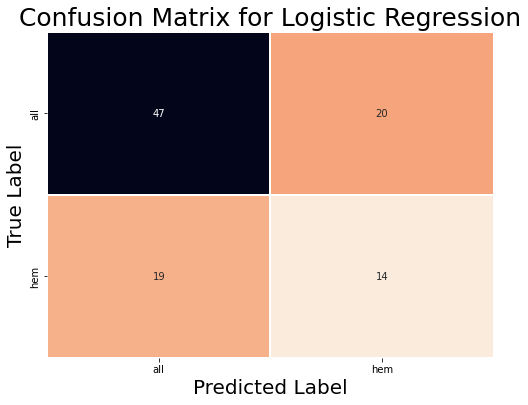

In [ ]:
y_test_labels = np.argmax(pkl_y, axis=1)
conf_mat_0 = confusion_matrix(y_test_labels, y_predict_0)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat_0,
            annot=True,
            cbar=False,
            xticklabels = class_names,
            yticklabels = class_names,
            cmap = "rocket_r",
            linewidths = 1)
plt.title('Confusion Matrix for Logistic Regression', 
          size = 25, 
          y = 1)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

The confusion matrix above outlines some specific findings that should be noted:
•	Despite the application of higher weight to 'hem' cells, the model is still more likely to predict an 'all' label than a 'hem' label
•	The model incorrectly predicts 'hem' cells as 'all' just as often as it incorrectly predicts 'all' cells as 'hem' cells


# Neural Network Model

Sequential models are constructed by adding layers and adjusting the parameters of each individual layer. The model constructed in this notebook was created with three 2-dimensional convolution layers, followed by a flattened layer and 2 dense layers. The convolutional layers received the most adjustment in terms of parameter optimization. Regularizers were established on these layers with the sole purpose of reducing overfitting. Two regularizers were available, L1 and L2, with the option to utilize both regularizers in conjunction for each parameter. Ultimately, L2 was chosen as the sole regularizer since it specifically serves the function of reducing overfitting. Each convolutional layer was also given a dropout function, since doing so also reduces overfitting. All three layers were also given maximum pooling layers. The final output layer of this model was set to a sigmoid activating dense layer with two outputs. This output layer serves to provide a binary classification between two results, those being cancerous and non-cancerous.

The final phase of analysis was to assess the model’s performance on the testing data. Just as for the training and validation data, the testing data was imported via an image generator. However, in the original dataset, the validation data was as labelled differently than the training set. For this reason, a different methodology was used to import the data. The validation images were imported and labelled in accordance with the CSV file (and subsequent extracted dataframe) that was provided with the original data. The same parameter optimizations that were utilized for the training and validation generators were utilized for the test generator as well.
The CNN performed much better than the logistic regression model, having accomplished an accuracy score of 75%. The confusion matrix below showcases how this new model adapted compared to the logistic regression model.


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = 'relu', 
                 #input_shape = (480, 480, 3)
                 ))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

#model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile('SGD', 
              loss = tf.losses.CategoricalCrossentropy(), 
              metrics = ['categorical_accuracy'])
#model.summary()

In [ ]:
model_1 = model.fit(train_generator, 
                 epochs = 50, 
                 validation_data = validation_generator, 
                 class_weight = weights,
                 callbacks = [early_stop])

Epoch 1/50
275/275 [==============================] - 157s 564ms/step - loss: 0.7108 - categorical_accuracy: 0.7711 - val_loss: 0.5625 - val_categorical_accuracy: 0.7442
Epoch 2/50
275/275 [==============================] - 155s 562ms/step - loss: 0.6794 - categorical_accuracy: 0.7849 - val_loss: 0.5646 - val_categorical_accuracy: 0.7448
Epoch 3/50
275/275 [==============================] - 154s 561ms/step - loss: 0.6735 - categorical_accuracy: 0.7884 - val_loss: 0.5237 - val_categorical_accuracy: 0.7378
Epoch 4/50
275/275 [==============================] - 154s 561ms/step - loss: 0.6739 - categorical_accuracy: 0.7885 - val_loss: 0.5578 - val_categorical_accuracy: 0.7442
Epoch 5/50
275/275 [==============================] - 154s 559ms/step - loss: 0.6725 - categorical_accuracy: 0.7889 - val_loss: 0.5319 - val_categorical_accuracy: 0.7383
Epoch 6/50
275/275 [==============================] - 154s 558ms/step - loss: 0.6696 - categorical_accuracy: 0.7882 - val_loss: 0.5563 - val_categoric

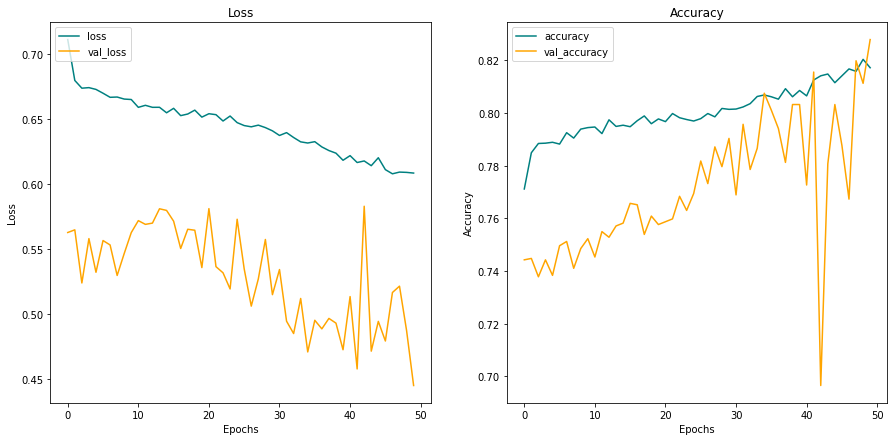

In [ ]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1, 2, 1, title = 'Loss')
plt.plot(model_1.history['loss'], 
         color = 'teal', 
         label = 'loss')
plt.plot(model_1.history['val_loss'], 
         color = 'orange', 
         label = 'val_loss')
plt.legend(loc = "upper left")
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2, title = 'Accuracy')
plt.plot(model_1.history['categorical_accuracy'], 
         color = 'teal', 
         label = 'accuracy')
plt.plot(model_1.history['val_categorical_accuracy'], 
         color = 'orange', 
         label = 'val_accuracy')
plt.legend(loc = "upper left")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

#plt.subplots_adjust(wspace=1) 
plt.show()

In [ ]:
# Evaluate the model's performance on the test data
score_1 = model.evaluate(X_test, y_test)

print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

4/4 [==============================] - 0s 11ms/step - loss: 0.5380 - categorical_accuracy: 0.7500
Test loss: 0.5379656553268433
Test accuracy: 0.75


In [ ]:
# Calculate the predictions
predict_probas_1 = model.predict(X_test)

# Convert probabilities to label encoding
y_predict_1 = np.argmax(predict_probas_1, axis=1)

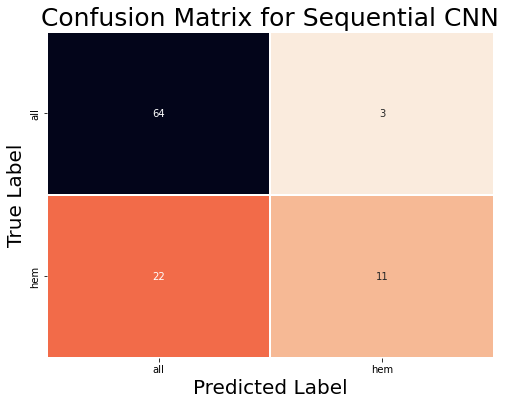

In [ ]:
conf_mat_1 = confusion_matrix(y_test_labels, y_predict_1)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat_1,
            annot=True,
            cbar=False,
            xticklabels = class_names,
            yticklabels = class_names,
            cmap = "rocket_r",
            linewidths = 1)
plt.title('Confusion Matrix for Sequential CNN', 
          size = 25, 
          y = 1.01)
plt.xlabel("Predicted Label", size = 20)
plt.ylabel("True Label", size = 20)
plt.show()

The most notable findings in the CNN performance are as follows:
•	The model is still more likely to predict 'all' cells than it is normal cells
•	The model did a significantly better job in correctly classifying normal cells compared to the logistic regression model.
•	Many more 'all' cells were correctly labelled by the model when compared to the logistic regression model